## Done by 

### 1. Jay Chothani (D22014)
### 2. Kreena Sheth (D22022)
### 3. Sachin Singh (D22043)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random as rm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
x1=np.random.randint(0,100,25000)
x2=np.random.randint(0,100,25000)
x3=np.random.randint(0,100,25000)
a=np.random.randint(0,30,25000)
x4=x3*2+a
y=np.random.randint(0,100,25000)

In [117]:
data=pd.DataFrame({'var1':x1,'var2':x2,'var3':x3,'var4':x4,'target':y})
data.head()

,var1,var2,var3,var4,target
0,40,37,92,203,29
1,7,35,88,181,69
2,99,79,64,152,32
3,37,70,35,86,9
4,19,57,15,51,63


In [118]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data.var1, data.var2)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(data.var2, data.var3)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(data.var3, data.var1)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(data.var4, data.var1)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(data.var2, data.var4)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(data.var3, data.var4)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.003
Pearsons correlation: 0.001
Pearsons correlation: 0.008
Pearsons correlation: 0.007
Pearsons correlation: 0.002
Pearsons correlation: 0.989


In [119]:
data.corr()

,var1,var2,var3,var4,target
var1,1.000000,-0.002906,0.007827,0.006701,0.010710
var2,-0.002906,1.000000,0.001120,0.001758,-0.008047
var3,0.007827,0.001120,1.000000,0.988993,0.006975
var4,0.006701,0.001758,0.988993,1.000000,0.007502
target,0.010710,-0.008047,0.006975,0.007502,1.000000


<AxesSubplot:>

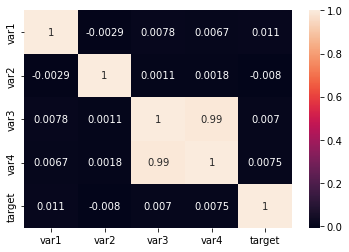

In [120]:
sns.heatmap(data.corr(),annot=True)

In [121]:
X=data[['var1','var2','var3','var4']]


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [122]:
vif_data

,feature,VIF
0,var1,3.028877
1,var2,3.031153
2,var3,152.968354
3,var4,170.967892


## with all features (model built on whole population)

In [123]:
X=data.drop(['target'],axis=1)
y=data.target

In [124]:
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
np.sqrt(mean_squared_error(y,y_pred))

28.718811150813274

## with removed feature i.e not correlated  (model built on whole population)

In [127]:
X=data.drop(['target','var4'],axis=1)
y=data.target

In [128]:
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)

In [129]:
np.sqrt(mean_squared_error(y,y_pred))

28.719063496126036

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## with all features for samples (multicollinearity within features)

In [131]:
n=1000
rmse=[]
for i in range(100):
    sample = data.sample(n)
    X = sample.drop(['target'],axis=1)
    y = sample['target']

    
    lr=LinearRegression()
    lr.fit(X,y)
    y_pred=lr.predict(X)
    
    rmse.append(np.sqrt(mean_squared_error(y,y_pred)))
print(np.mean(rmse))

28.620360073442395


## Checking Coefficent

In [141]:
l1 = []
l2 = []
l3 = []
lr = LinearRegression()
for i in range(1000):
    sample = data.sample(10)
    X = sample.drop('target',axis=1)
    y = sample['target']
    lr.fit(X,y)
    l1.append(lr.coef_[0])
    l2.append(lr.coef_[1])
    l3.append(lr.coef_[2])

In [142]:
np.std(l1),np.std(l2),np.std(l3)

(0.46972780703209654, 0.45230594973563965, 3.1531377910898586)

## with removed features for samples (no multicollinearity)

In [132]:
n=1000
rmse=[]
for i in range(100):
    sample = data.sample(10)
    X = sample.drop(['target','var4'],axis=1)
    y = sample['target']
    
    lr=LinearRegression()
    lr.fit(X,y)
    y_pred=lr.predict(X)
    
    rmse.append(np.sqrt(mean_squared_error(y,y_pred)))
print(np.mean(rmse))

21.52485344892036


## Checking Coefficent

In [143]:
l1 = []
l2 = []
l3 = []
lr = LinearRegression()
for i in range(1000):
    sample = data.sample(10)
    X = sample.drop(['target','var4'],axis=1)
    y = sample['target']
    lr.fit(X,y)
    l1.append(lr.coef_[0])
    l2.append(lr.coef_[1])
    l3.append(lr.coef_[2])

In [144]:
np.std(l1),np.std(l2),np.std(l3)

(0.4342486783985902, 0.4217988960148251, 0.4457991085502787)

# Results

## so from above we conclude that when there is multicollinearity standard error of model is greather then model with features where there is no multicollinearity

##  as we can see the standard deviation of coefficient is decrases when we remove variable which have multi colinearity